In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme('notebook')

# 1. Prepare and preprocessing data

## 1.1 Channels dataset

### 1. Đọc dữ liệu

In [2]:
channel_df = pd.read_csv('Data/channels.csv')
channel_df

,Channel,PlaylistId,PublishedTime,Views,Subscribers,Videos
0,FAPTV,UU0jDoh3tVXCaqJ6oTve8ebA,2014-02-26T15:44:42Z,4870041141,13300000,567
1,ĐÔNG TÂY PROMOTION OFFICIAL,UUFMEYTv6N64hIL9FlQ_hxBw,2014-12-17T03:07:44Z,4867786232,8080000,7773
2,DIEN QUAN Comedy / Hài,UUwmurIyZ6FHyVPtKppe_2_A,2014-12-17T06:57:46Z,3941420767,5940000,4051
3,VTV Giải Trí Official,UUuJ5k3GndbHnXLYyiIR6Z8Q,2018-12-20T07:33:59Z,2075532878,2450000,8890
4,Vie Channel - HTV2,UUkna2OcuN1E6u5I8GVtdkOw,2012-06-04T08:47:14Z,4311560277,9860000,8593


### 2. Kiểu dữ liệu có gì bất thường

In [3]:
channel_df.dtypes

Channel          object
PlaylistId       object
PublishedTime    object
Views             int64
Subscribers       int64
Videos            int64
dtype: object

### Tiền xử lý Datetime

In [4]:
channel_df['PublishedTime'] = channel_df['PublishedTime'].str.extract(r'(\d+\-\d+\-\d+)')
channel_df['PublishedTime'] = pd.to_datetime(channel_df['PublishedTime'])

In [5]:
channel_df.dtypes

Channel                  object
PlaylistId               object
PublishedTime    datetime64[ns]
Views                     int64
Subscribers               int64
Videos                    int64
dtype: object

## 3. Dữ liệu có bị thiếu không

In [6]:
channel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Channel        5 non-null      object        
 1   PlaylistId     5 non-null      object        
 2   PublishedTime  5 non-null      datetime64[ns]
 3   Views          5 non-null      int64         
 4   Subscribers    5 non-null      int64         
 5   Videos         5 non-null      int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 368.0+ bytes


## 1.2 Information video dataset

### 1. Đọc dữ liệu

In [7]:
information_df = pd.read_csv('Data/information_video.csv')
information_df.head()

,VideoId,Channel,Title,publishedTime,CategoryId,Description,Duration,Dimension,Caption,Tags,Views,Likes,Comments,Artists
0,LObx_aVfpuA,VTV Giải Trí Official,Chồng cũ vợ cũ người yêu cũ tập 22 | Một pha '...,2022-07-08T15:30:09Z,24,▶️ Full Chồng cũ vợ cũ người yêu cũ tập 22: ht...,PT5M9S,2d,False,"['vtv giải trí', 'vtv giai tri', 'phim hay', '...",10890,91,5,"['Việt Anh (NSUT)', 'Lã Thanh Huyền', 'Thẩm T..."
1,a8-B8yByqK0,VTV Giải Trí Official,TRỰC TIẾP VTV3 | Chồng cũ vợ cũ người yêu cũ t...,2022-07-08T14:30:12Z,24,TRỰC TIẾP VTV3 | Chồng cũ vợ cũ người yêu cũ t...,PT4M9S,2d,False,"['vtv giải trí', 'vtv giai tri', 'phim hay', '...",30827,158,5,[]
2,B2WuOIw9w9U,VTV Giải Trí Official,Lối Nhỏ Vào Đời - Tập 21 | Bác Thành đau khổ c...,2022-07-08T14:30:02Z,24,Lối Nhỏ Vào Đời - Tập 21 | Bác Thành đau khổ c...,PT5M8S,2d,False,"['vtv giải trí', 'vtv giai tri', 'phim hay', '...",24188,184,16,[]
3,0kjiyMoIeU0,VTV Giải Trí Official,TRỰC TIẾP VTV1 | TẬP 21: Lối Nhỏ Vào Đời,2022-07-08T14:00:13Z,24,TRỰC TIẾP VTV1 | TẬP 21: Lối Nhỏ Vào Đời \n👉 X...,PT4M1S,2d,False,"['vtv giải trí', 'vtv giai tri', 'phim hay', '...",33323,163,17,[]
4,lL_UZK0Zdxo,VTV Giải Trí Official,Chồng cũ vợ cũ người yêu cũ tập 21 | Vợ mới từ...,2022-07-08T11:45:03Z,24,▶️ Full Chồng cũ vợ cũ người yêu cũ tập 21: ht...,PT4M9S,2d,False,"['vtv giải trí', 'vtv giai tri', 'phim hay', '...",8730,40,1,"['Việt Anh (NSUT)', 'Lã Thanh Huyền', 'Thẩm T..."


### 2. Dữ liệu có bao nhiêu dòng và cột

In [8]:
num_rows, num_cols = information_df.shape
print(f'Dữ liệu có {num_rows} dòng')
print(f'Dữ liệu có {num_cols} cột')

Dữ liệu có 29899 dòng
Dữ liệu có 14 cột


### 3. Kiểu dữ liệu có gì bất thường

In [9]:
information_df.dtypes

VideoId          object
Channel          object
Title            object
publishedTime    object
CategoryId        int64
Description      object
Duration         object
Dimension        object
Caption            bool
Tags             object
Views             int64
Likes             int64
Comments          int64
Artists          object
dtype: object

### Tiền xử lý

In [10]:
# ! pip install python-dateutil
# ! pip install isodate

In [11]:
from dateutil import parser
import isodate

- **Chuyển về dạng datetime và thêm vào cột "publishedDayName" tương ứng ngày trong tuần**

In [12]:
information_df['publishedTime'] = information_df['publishedTime'].apply(lambda x: parser.parse(x))
information_df['publishedDayName'] = information_df['publishedTime'].apply(lambda x: x.strftime('%A'))
information_df[['publishedTime','publishedDayName']].tail()

,publishedTime,publishedDayName
29894,2012-06-22 06:53:14+00:00,Friday
29895,2012-06-14 10:14:36+00:00,Thursday
29896,2012-06-08 05:02:08+00:00,Friday
29897,2012-06-08 04:49:13+00:00,Friday
29898,2012-06-07 03:02:16+00:00,Thursday


- **Chuyển Duration của video về seconds**

In [13]:
information_df['durationSecond'] = information_df['Duration'].apply(lambda x: isodate.parse_duration(x))
information_df['durationSecond'] = information_df['durationSecond'].astype('timedelta64[s]')
information_df[['Duration','durationSecond']].head()

,Duration,durationSecond
0,PT5M9S,309.0
1,PT4M9S,249.0
2,PT5M8S,308.0
3,PT4M1S,241.0
4,PT4M9S,249.0


In [14]:
# kiểm tra lại
information_df.dtypes

VideoId                              object
Channel                              object
Title                                object
publishedTime       datetime64[ns, tzutc()]
CategoryId                            int64
Description                          object
Duration                             object
Dimension                            object
Caption                                bool
Tags                                 object
Views                                 int64
Likes                                 int64
Comments                              int64
Artists                              object
publishedDayName                     object
durationSecond                      float64
dtype: object

### 4. Dữ liệu có bị thiếu không

In [15]:
information_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29899 entries, 0 to 29898
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype                  
---  ------            --------------  -----                  
 0   VideoId           29899 non-null  object                 
 1   Channel           29899 non-null  object                 
 2   Title             29899 non-null  object                 
 3   publishedTime     29899 non-null  datetime64[ns, tzutc()]
 4   CategoryId        29899 non-null  int64                  
 5   Description       29891 non-null  object                 
 6   Duration          29899 non-null  object                 
 7   Dimension         29899 non-null  object                 
 8   Caption           29899 non-null  bool                   
 9   Tags              29899 non-null  object                 
 10  Views             29899 non-null  int64                  
 11  Likes             29899 non-null  int64                  
 12  Comm

**<font size = '3'> Description bị thiếu thì không có gì bất thường </font>**

### 5.Thêm vào số lượng tags cho video

In [16]:
# tiền xử lý giá trị vì Tags ban đầu là string
information_df['Tags'] = information_df['Tags'].apply(lambda x : x.lstrip('[').rstrip(']').strip().split(', '))
information_df['Tags'] = information_df['Tags'].apply(lambda x: [i.strip("'") for i in x])

In [17]:
information_df['tagCount'] = information_df['Tags'].apply(lambda x: len(x))
information_df[['Tags','tagCount']].head()

,Tags,tagCount
0,"[vtv giải trí, vtv giai tri, phim hay, phim vt...",26
1,"[vtv giải trí, vtv giai tri, phim hay, phim vt...",20
2,"[vtv giải trí, vtv giai tri, phim hay, phim vt...",23
3,"[vtv giải trí, vtv giai tri, phim hay, phim vt...",24
4,"[vtv giải trí, vtv giai tri, phim hay, phim vt...",27


### 6.Thêm vào Category tương ứng với CategoryId

In [18]:
category_df = pd.read_csv('Data/category_video.csv')

In [19]:
# merge 2 DataFrame lại với nhau
information_df = information_df.merge(category_df, on='CategoryId')
information_df[['CategoryId','Category']].tail()

,CategoryId,Category
29894,26,Howto & Style
29895,26,Howto & Style
29896,26,Howto & Style
29897,27,Education
29898,27,Education


### 7. Thêm vào danh sách nghệ sĩ tham gia vào video(nếu có)
- **Dựa vào Description , Title và Tags video**

In [20]:
# !pip install pyvi

In [21]:
# lấy danh sách các nghệ sĩ Việt Nam theo wikipedia
list_artists = []
with open('Data/artists.txt','r') as file:
    lines  = file.readlines()
    for line in lines:
        list_artists.append(line.strip())

list_artists[:5]

['Bá Anh',
 'Bá Thắng',
 'Bạch Công Khanh',
 'Bảo Anh (Ca sĩ)',
 'Bảo Anh (diễn viên)']

In [22]:
from pyvi import ViPosTagger, ViTokenizer

def get_artists(text, list_artists):
    
    '''
    Params:
        text -> string : Description or Title 
        list_artists -> array : the list of artists which collect from wikipedia
    Return:
        list of artists who get involved in this video -> array
        
    In order to optimize performance, we find all words which is Np before checking its in list_artists
    '''
    
    artists = [] # danh sách nghệ sĩ tham gia
    try:
        pos_tagging = ViPosTagger.postagging(ViTokenizer.tokenize(text))

        # lọc ra những danh từ riêng
        for idx in range(len(pos_tagging[0])):
            if pos_tagging[1][idx] == 'Np' and pos_tagging[0][idx] not in artists:
                artists.append(pos_tagging[0][idx])

        # kiểm tra trong list_artists:
        idx, counts = 0, 0
        loops = len(artists)
        while idx < loops:
            artists[idx] = artists[idx].split('_')
            artists[idx] = ' '.join(artists[idx])
            for artist in list_artists:
                if artists[idx] in artist and len(artists[idx].split(' ')) > 1:
                    artists.append(artist)
                    counts += 1
            idx += 1
        # vẫn sẽ có trường hợp dữ liệu không đề cập artist nên trả về []
        return artists[-counts:] if counts > 0 else []
    # nếu tokenize không thể thực hiện được
    except:
        return []

![title](Data/update_tokenize.png)

In [23]:
information_df['Artists'][10000:10010]

10000       ['Hương Giang (diễn viên)', 'Hoàng Thùy Linh']
10001    ['Hồng Vân', 'Phạm Thanh Duy', 'Cát Tường', 'T...
10002    ['Hari Won', 'Lê Dương Bảo Lâm', 'Trường Giang...
10003                       ['Mạc Văn Khoa', 'Tiết Cương']
10004                                     ['Trường Giang']
10005           ['Hari Won', 'Ngân Khánh', 'Trường Giang']
10006    ['Mạc Văn Khoa', 'Lâm Vỹ Dạ', 'Lê Dương Bảo Lâ...
10007    ['Lâm Vỹ Dạ', 'Đại Nghĩa', 'Lê Dương Bảo Lâm',...
10008                           ['Lâm Vỹ Dạ', 'Huỳnh Lập']
10009                                ['Puka', 'Elly Trần']
Name: Artists, dtype: object

### 8. Thêm vào số lượng nghệ sĩ tham gia

In [24]:
information_df['Artists'] = information_df['Artists'].apply(lambda x : x.lstrip('[').rstrip(']').strip().split(', '))
information_df['Artists'] = information_df['Artists'].apply(lambda x: [i.strip("'") for i in x])

In [25]:
information_df['artistCount'] = information_df['Artists'].apply(lambda x: len(x) if len(x) >= 1 and x[0] != '' else 0)
information_df[['Artists','artistCount']].head()                                                 

,Artists,artistCount
0,"[Việt Anh (NSUT), Lã Thanh Huyền, Thẩm Thúy H...",5
1,[],0
2,[],0
3,[],0
4,"[Việt Anh (NSUT), Lã Thanh Huyền, Thẩm Thúy H...",5


### Tiền xử lý: Để tránh ảnh hưởng đến thực tế , chúng ta sẽ xóa nhưng video có số lượng `Artist = 0`

In [26]:
information_df = information_df[information_df['artistCount'] > 0].reset_index()
information_df[['Artists','artistCount']].head()

,Artists,artistCount
0,"[Việt Anh (NSUT), Lã Thanh Huyền, Thẩm Thúy H...",5
1,"[Việt Anh (NSUT), Lã Thanh Huyền, Thẩm Thúy H...",5
2,[Quỳnh Nga],1
3,"[Việt Anh (NSUT), Lã Thanh Huyền, Thẩm Thúy H...",5
4,[Dustin Nguyễn],1


### 9. Thêm số lượng từ trong Title 

In [27]:
information_df['titleCountWord'] = information_df['Title'].apply(lambda x: len(x.split()))
information_df[['Title','titleCountWord']].head()

,Title,titleCountWord
0,Chồng cũ vợ cũ người yêu cũ tập 22 | Một pha '...,23
1,Chồng cũ vợ cũ người yêu cũ tập 21 | Vợ mới từ...,24
2,Chồng cũ vợ cũ người yêu cũ tập 21 | Minh Minh...,22
3,Chồng cũ vợ cũ người yêu cũ tập 21 | Có vợ đẹp...,26
4,Cuộc hẹn cuối tuần số 2 | H'Hen Niê múa bản sắ...,25


# 2. EDA

## 2.1. Trực quan dữ liệu số lượt xem/video, số lượng subscriber của các channels trên.

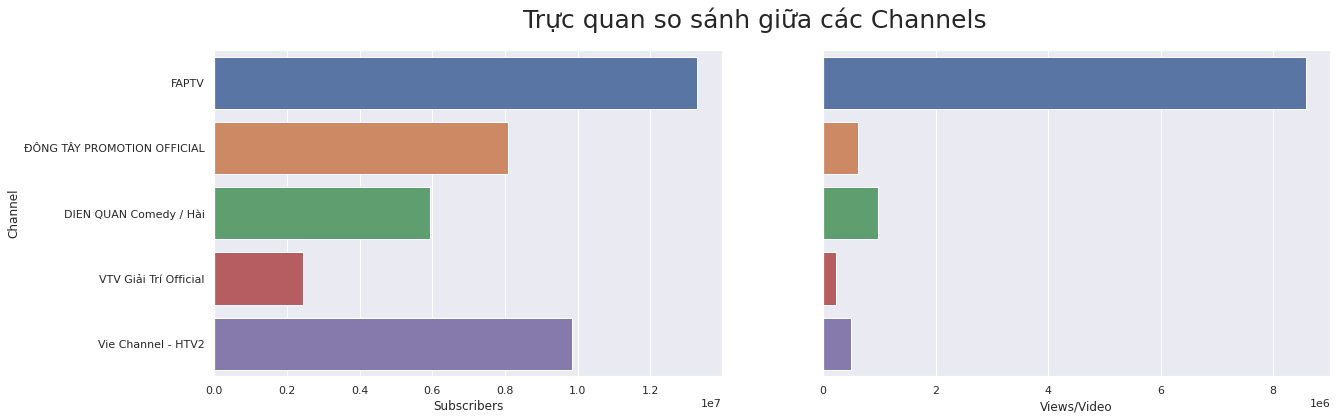

In [28]:
fig, axs = plt.subplots(1,2, figsize = (20,6))
sns.barplot(y = 'Channel' , x = 'Subscribers', data = channel_df, ax = axs[0])
sns.barplot(y = channel_df['Channel'], x = channel_df['Views'] / channel_df['Videos'], ax = axs[1])

axs[1].get_yaxis().set_visible(False)
axs[0].set_xlabel('Subscribers', fontsize = 12)
axs[1].set_xlabel('Views/Video', fontsize = 12)
plt.suptitle('Trực quan so sánh giữa các Channels', fontsize = 25)
plt.show()

## 2.2 Thời lượng chiếu (Duration)

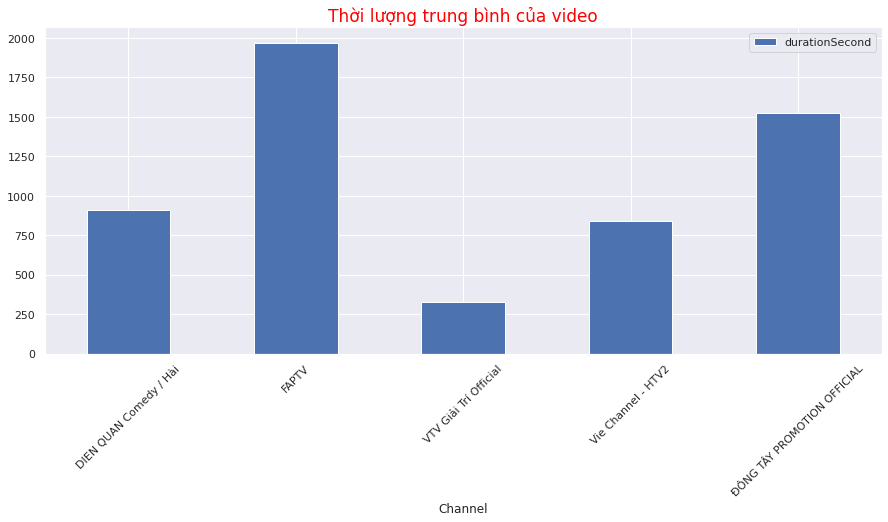

In [29]:
plt.rcParams['figure.figsize'] = 15,6
information_df.groupby('Channel')[['durationSecond']].mean().plot.bar()
plt.title('Thời lượng trung bình của video', fontsize = 17,color = 'red')
plt.tick_params('x', rotation = 45)
plt.show()

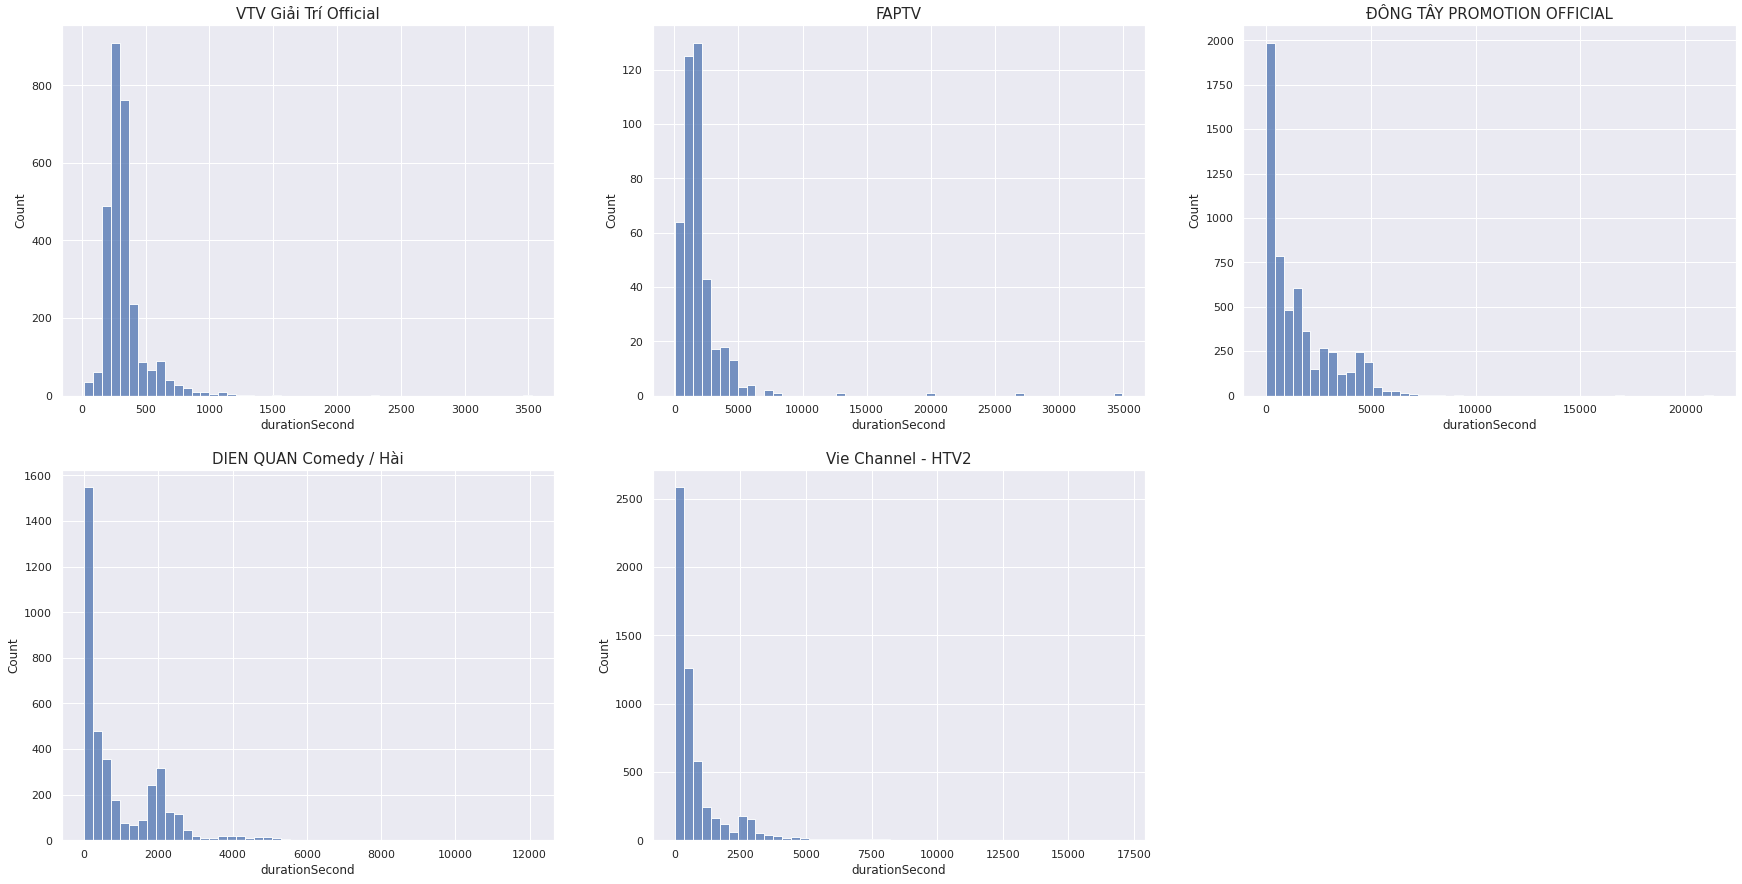

In [30]:
channel_names = information_df['Channel'].unique()

fig, axs = plt.subplots(2,3,figsize = (30,15))

for idx in range(5):
    r, c = idx // 3, idx % 3
    sns.histplot(data = information_df.loc[information_df['Channel'] == channel_names[idx], 'durationSecond'], ax = axs[r,c], bins = 50)
    axs[r,c].set_title(channel_names[idx], fontsize = 15)

axs[1,2].set_visible(False)
plt.show()

### Nhận xét
- <font size="3">`VTV Giải Trí Official` tập trung vào video ngắn là chính</font>
- <font size ="3">`FAPTV` có thời lượng video trung bình cao nhất. Theo histogram thì giá trị chủ yếu tập trung quanh 1000-3000s .
                   Phát hiện một số video dài bất thường `(35000s)`</font>
- <font size ="3"> Các channels còn lại thì không có gì bất thường </font>

## 2.3.1 Số lượng views, likes, comments của từng thể loại video.

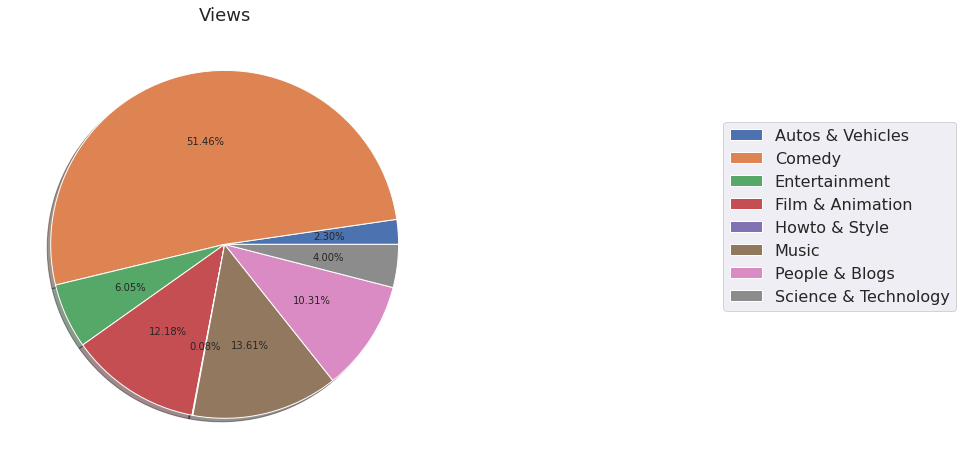

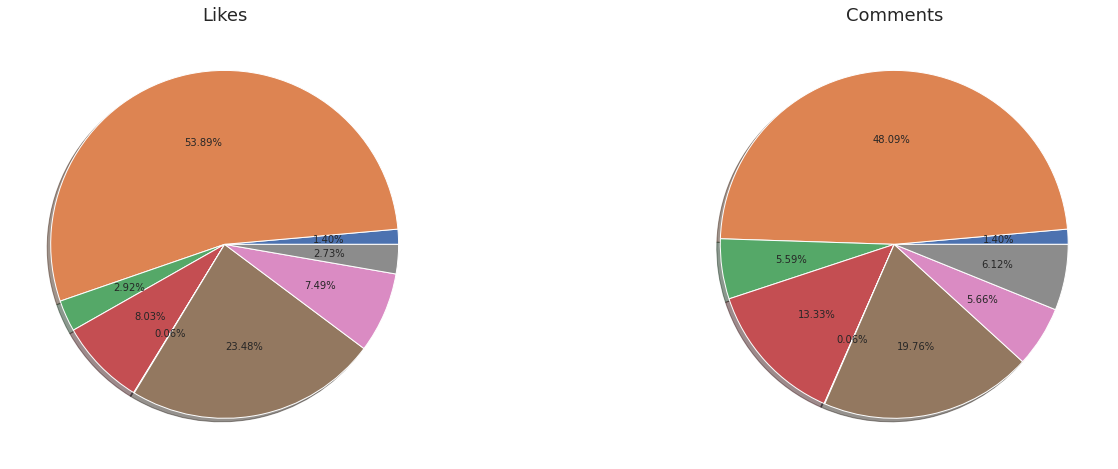

In [31]:
data = information_df[['Category','Views','Likes', 'Comments']].groupby('Category').mean()

# views
plt.rcParams['figure.figsize'] = 26,8
plt.pie(x = data['Views'], 
        autopct='%.2f%%', 
        shadow=True)
plt.title('Views', fontsize = 18)
plt.legend(labels = data.index, loc = 'upper right',
           bbox_to_anchor=(2.2,0.8),
           prop={'size': 16})


fig, axs = plt.subplots(1,2, figsize = (22,8))
# likes
pa, text, _ = axs[0].pie(x = data['Likes'],
                        autopct='%.2f%%',
                        shadow=True)
axs[0].set_title('Likes',fontsize = 18)

# comments
axs[1].pie(x = data['Comments'],
            autopct='%.2f%%',
            shadow=True)
axs[1].set_title('Comments',fontsize = 18)

plt.show()

### Nhận xét:
- <font size ='3'> Video thuộc thể loại `Comedy` có lượt ratting cao hơn hắn so với các thể loại khác. </font>
- <font size ='3'>Các video có thể loại `Howto & Style` có ratting rất thấp $(< 0.1\%)$ </font>


## 2.3.2 Mối quan hệ giữa Comment, Like với View của video

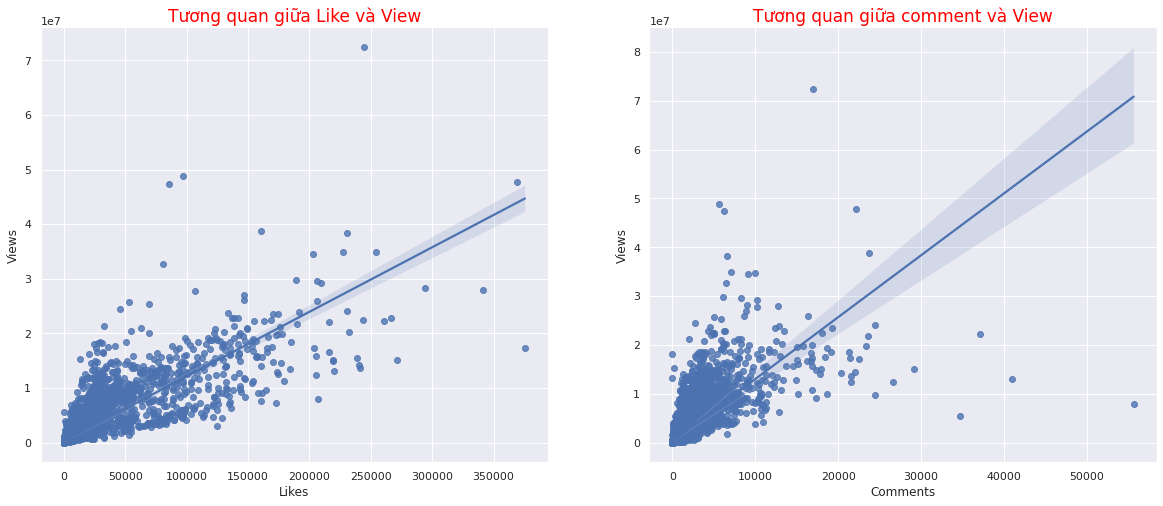

In [32]:
fig, axs = plt.subplots(1,2 ,figsize = (20,8))
sns.regplot(x = 'Likes', y = 'Views', data = information_df ,ax = axs[0])
sns.regplot(x = 'Comments', y = 'Views', data = information_df ,ax = axs[1])
axs[0].set_title('Tương quan giữa Like và View', fontsize = 17, color = 'red')
axs[1].set_title('Tương quan giữa comment và View', fontsize = 17, color= 'red' )
plt.show()

## 2.4 Thời gian các video đựợc đăng lên youtube theo tháng.

### Ý tưởng:
- <font size ='3'> Bước 1: Tạo data thống kê tổng số lượng video theo tháng </font>
- <font size ='3'> Bước 2: Tạo `pivot table` thống kê số lượng video từng tháng cho từng Channels</font>

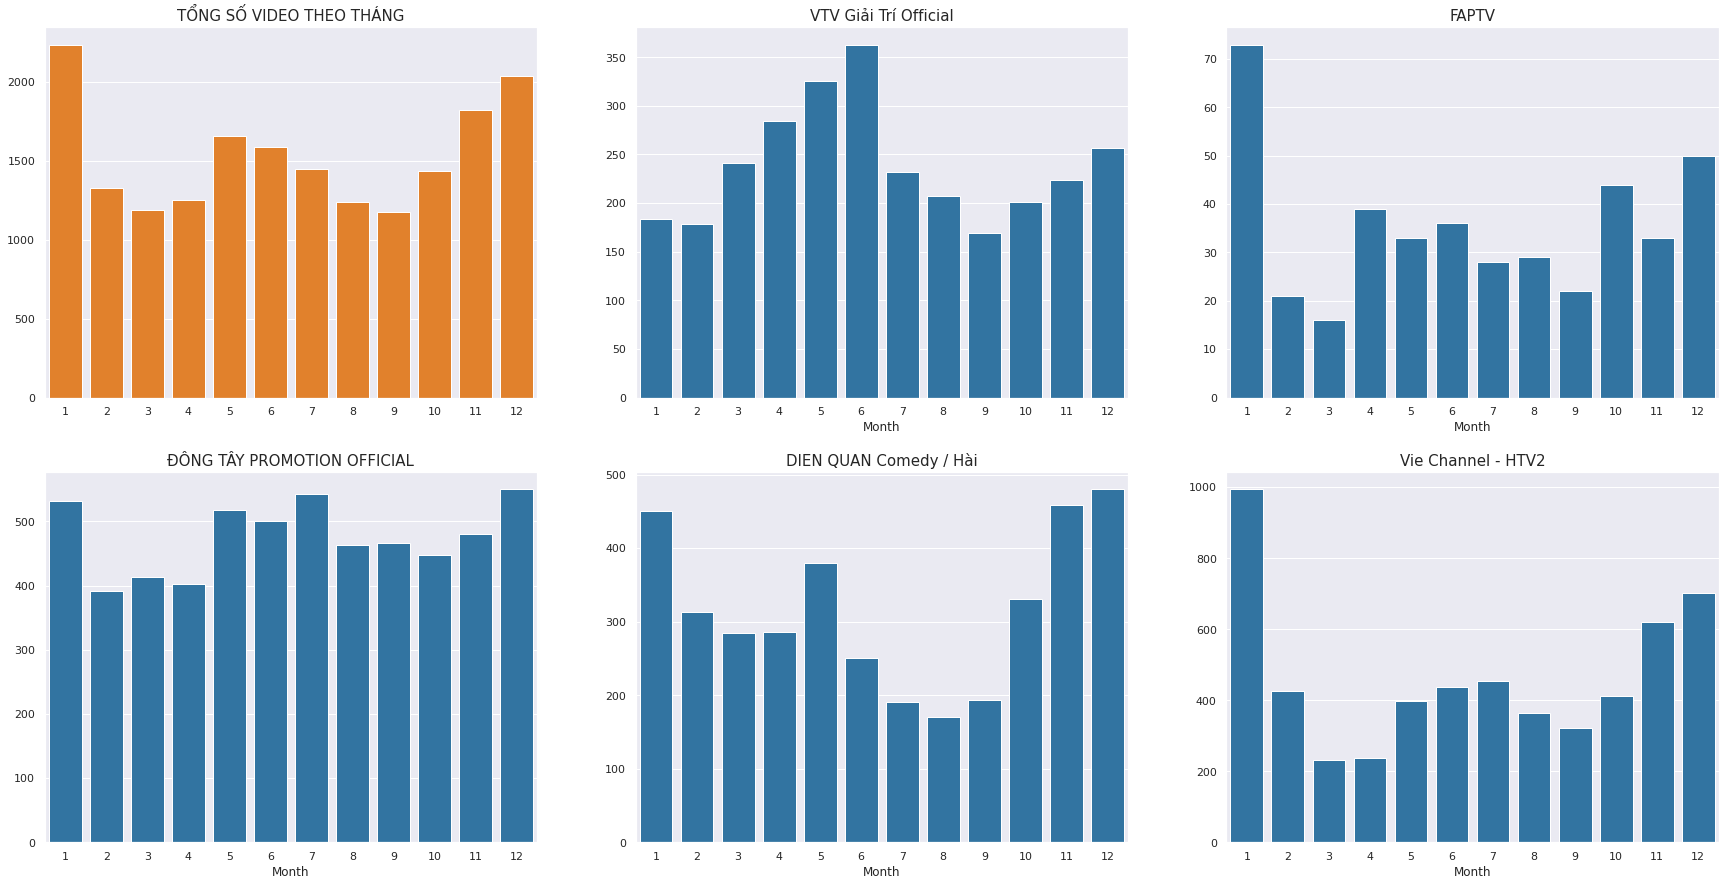

In [33]:
fig, axs = plt.subplots(2,3,figsize = (30,15))

# tổng video theo tháng
data = information_df['publishedTime'].dt.month.value_counts()
sns.barplot(x = data.index, y = data.values, 
            ax = axs[0,0], color = 'tab:orange')
axs[0,0].set_title("TỔNG SỐ VIDEO THEO THÁNG", fontsize = 15)

# số lượng video theo từng tháng của từng channels
information_df['Month'] = information_df['publishedTime'].dt.month
pivot = pd.pivot_table(values = 'VideoId', index = 'Channel', columns= 'Month',
                       data = information_df, aggfunc= 'count')
for idx in range(1,6):
    r, c = idx // 3, idx % 3
    sns.barplot(data = pivot.loc[pivot.index == channel_names[idx-1],:], 
                ax = axs[r,c], color = 'tab:blue')
    axs[r,c].set_title(channel_names[idx-1], fontsize = 15)
    # axs[r,c].set_ylim(0,1500)

plt.show()

### Nhận xét:
- <font size ='3'>ĐÔNG TÂY PROMOTION là channels có số lượng video ra đều nhất.</font>
- <font size ='3'> VTV Giải trí ra video nhiều nhất vào các `tháng hè 5-7`. </font>
- <font size ='3'>Các Channels còn lại tập trung vào `1-2 tháng dầu năm hoặc cuối năm` là chính </font>
- <font size ='3'>Nhìn tổng thể thì số lượng video ra nhiều nhất vào dịp cuối năm (tính theo lịch âm) </font>

#### **Insight: có thể thấy các dịp nghỉ như `nghỉ hè hoặc lễ tết` thì nhu cầu giải trí tăng. Nắm bắt tình hình đó các gameshow, phim, hài kịch đẩy mạnh ra video**

## 2.5 Thời gian các video đựợc đăng lên youtube theo ngày trong tuần

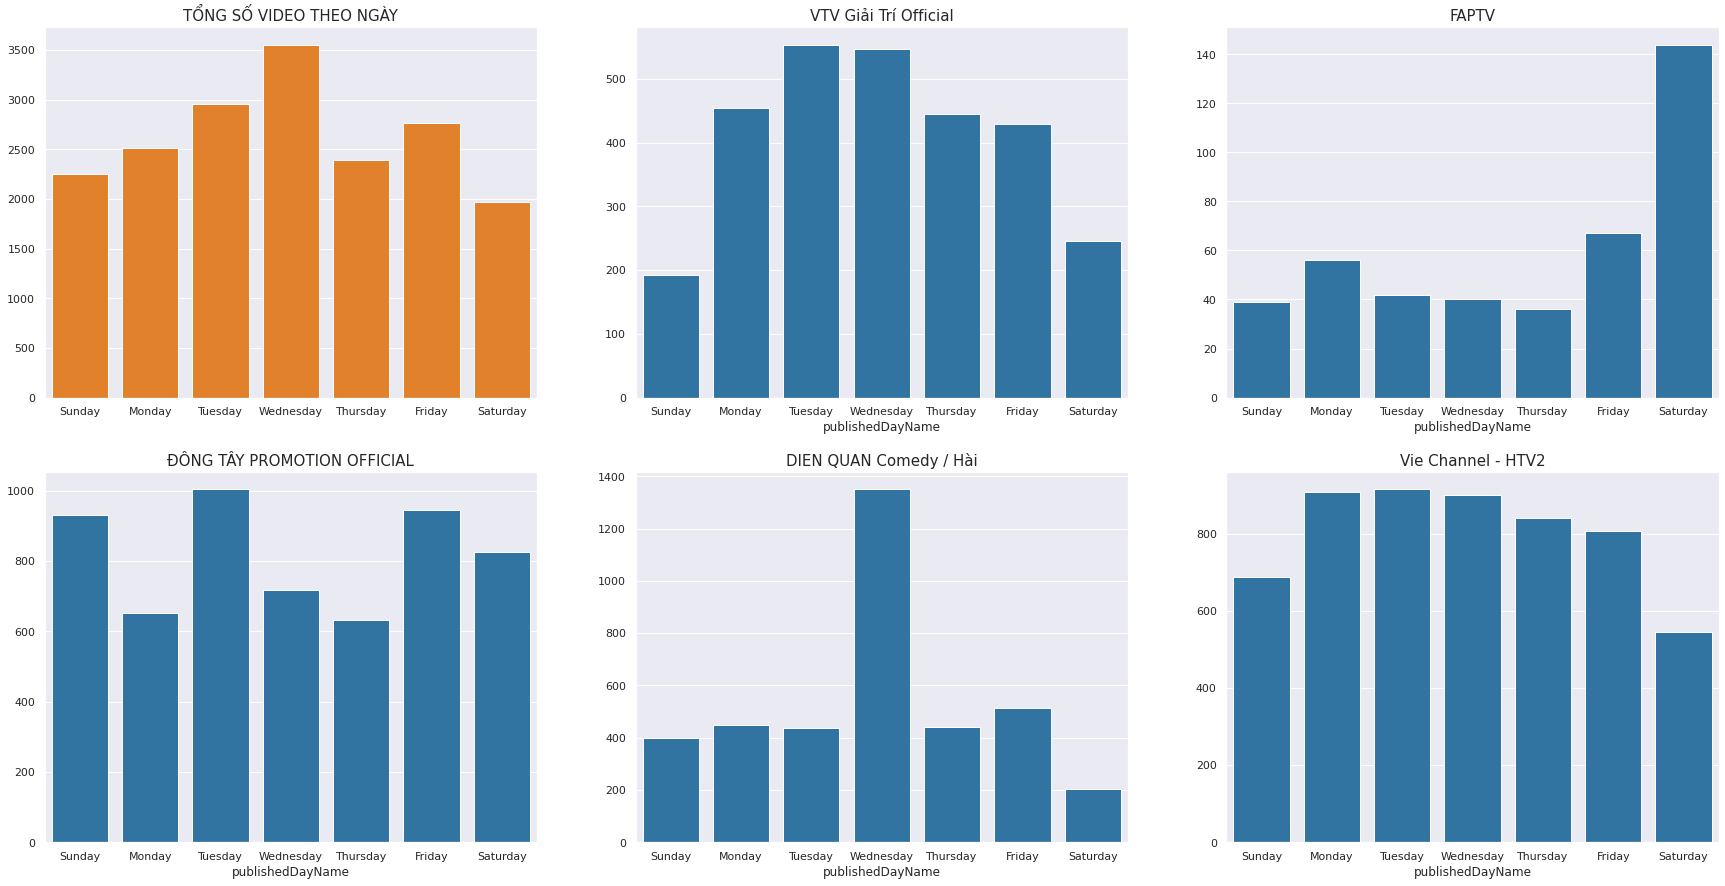

In [34]:
fig, axs = plt.subplots(2,3,figsize = (30,15))
list_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
# tổng video theo ngày
data = information_df['publishedDayName'].value_counts()
sns.barplot(x = data.index, y = data.values, 
            ax = axs[0,0], order=list_days, color = 'tab:orange')
axs[0,0].set_title("TỔNG SỐ VIDEO THEO NGÀY", fontsize = 15)

# số lượng video theo từng ngày của từng channels
pivot = pd.pivot_table(values = 'VideoId', index = 'Channel',columns= 'publishedDayName', 
                       data = information_df, aggfunc= 'count')
for idx in range(1,6):
    r, c = idx // 3, idx % 3
    sns.barplot(data = pivot.loc[pivot.index == channel_names[idx-1],:], 
                order = list_days, ax = axs[r,c], color = 'tab:blue')
    axs[r,c].set_title(channel_names[idx-1], fontsize = 15)

plt.show()

### Nhận xét:
- <font>FAPTV ra video chủ yếu vào T7</font>
- <font>DIEN QUAN ra video chủ yếu vào T4</font>
- <font>VTV Giải trí ra video chủ yêu vào giữa tuần T2-T6</font>
- <font>Channel còn lại thì ra video khá đều, đặc biệt là Vie Channel - HTV2, còn DONG TAY thì khá xen kẽ nhau </font>

#### **Insight:**

## 2.6 Thời gian các video được dăng lên theo buổi trong ngày

### Ý tưởng:
- <font size = '3'> Thêm vào cột "SessionDay"</font>
- <font size = '3'> Quy ước về thời gian</font>
    - <font size = '3'>05h - 12h: Morning</font>
    - <font size = '3'>13h - 17h: Afternoon</font>
    - <font size = '3'>18h - 21h: Evening</font>
    - <font size = '3'>22h - 0h: Night </font>
    - <font size = '3'>01h - 04h: Other </font>
- <font size = '3'> Trực quan hóa tương tự như ở trên</font>

In [35]:
information_df['SessionDay'] = information_df['publishedTime'].dt.hour
list_condition = [(information_df['SessionDay'] >= 5) & (information_df['SessionDay'] <= 12),
                  (information_df['SessionDay'] >= 13) & (information_df['SessionDay'] <= 17),
                  (information_df['SessionDay'] >= 18) & (information_df['SessionDay'] <= 21),
                  (information_df['SessionDay'] >= 22) | (information_df['SessionDay'] == 0),
                  (information_df['SessionDay'] >= 1) & (information_df['SessionDay'] <= 4)]

list_choice = ['Morning','Afternoon','Evening', 'Night', 'Other']
information_df['SessionDay'] = np.select(condlist=list_condition, choicelist=list_choice)

# check
information_df[['SessionDay','publishedTime']].head()

,SessionDay,publishedTime
0,Afternoon,2022-07-08 15:30:09+00:00
1,Morning,2022-07-08 11:45:03+00:00
2,Morning,2022-07-08 11:19:45+00:00
3,Morning,2022-07-08 09:00:12+00:00
4,Morning,2022-07-08 06:45:21+00:00


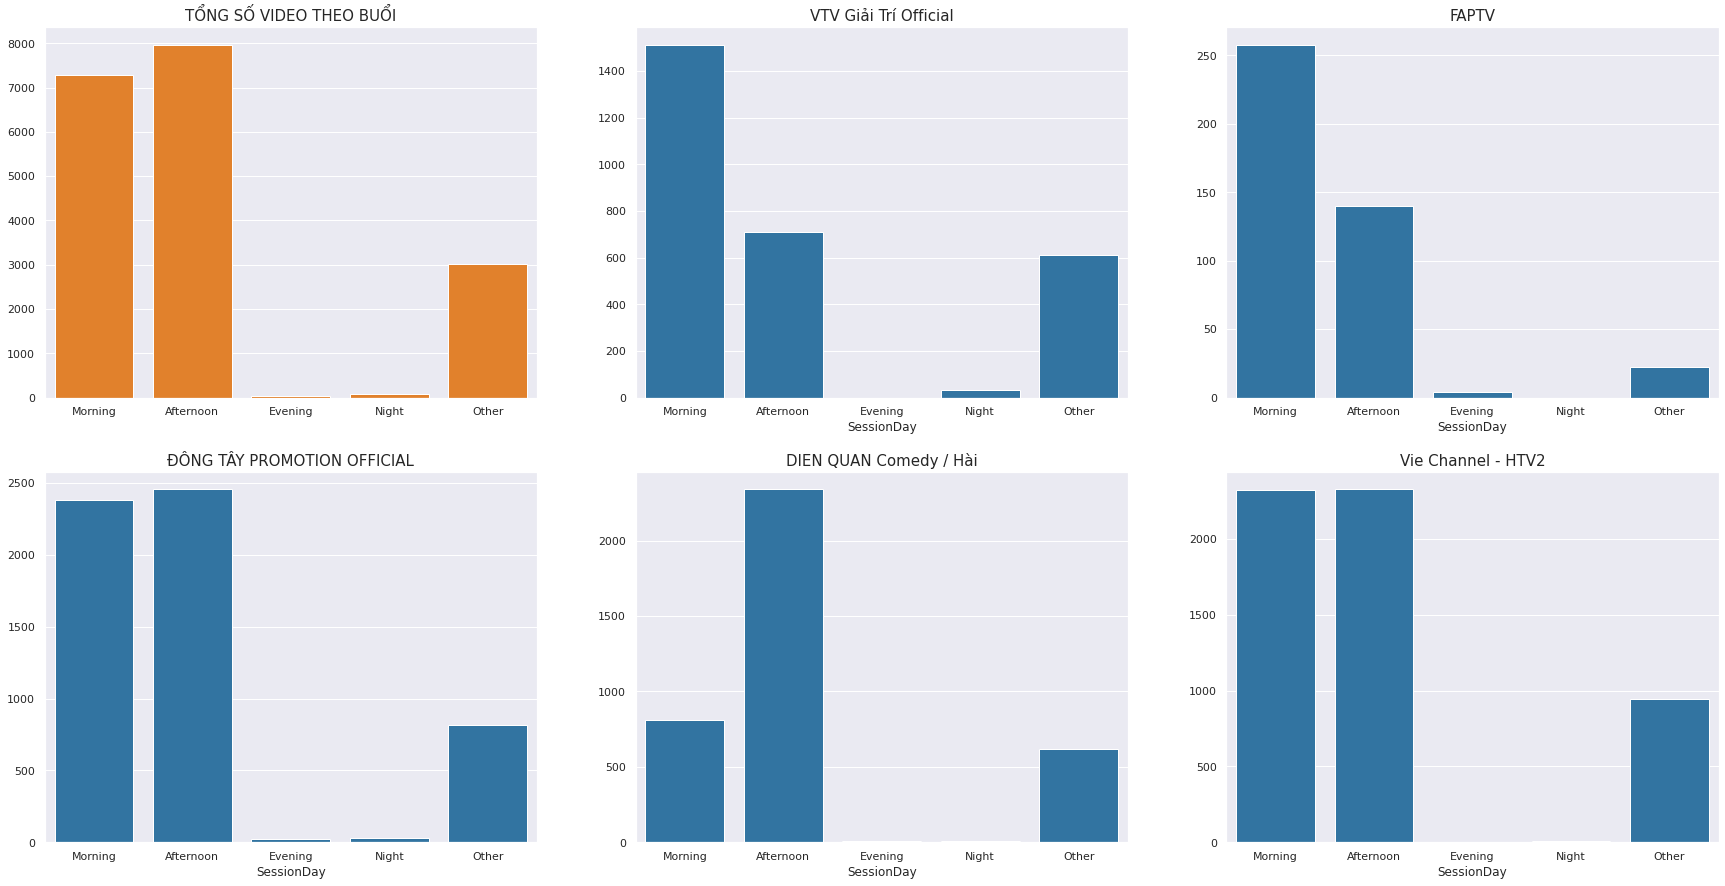

In [36]:
fig, axs = plt.subplots(2,3,figsize = (30,15))

# tổng video theo buổi
data = information_df['SessionDay'].value_counts()
sns.barplot(x = data.index, y = data.values, 
            ax = axs[0,0], order=list_choice, color = 'tab:orange')
axs[0,0].set_title("TỔNG SỐ VIDEO THEO BUỔI", fontsize = 15)

# số lượng video theo buổi của từng channels
pivot = pd.pivot_table(values = 'VideoId', index = 'Channel',columns= 'SessionDay', 
                       data = information_df, aggfunc= 'count')
for idx in range(1,6):
    r, c = idx // 3, idx % 3
    sns.barplot(data = pivot.loc[pivot.index == channel_names[idx-1],:], 
                order = list_choice, ax = axs[r,c], color = 'tab:blue')
    axs[r,c].set_title(channel_names[idx-1], fontsize = 15)

plt.show()

### Nhận xét:
- <font size = '3'>Các video được đăng lên nhiều nhất vào `buổi sáng và buổi chiều`</font>
- <font size = '3'>Số lượng video đăng lên vào khoảng 1h-4h sáng cũng khá nhiều như VTV Giải trí.</font>

# 3. Build model

## 3.1 Preprocessing

### Tạo một DataFrame `data`mới chứa dữ liệu đã được mã hóa sẵn sàng đưa vào huấn luyện
- X là dữ liệu các biến phụ thuộc
- y là kết quả cần dự đoán
- Các cột như `VideoId, Title, Description, Category(vì đã có CategoryId), Duration(vì có durationSecond),` \
`Dimension(vì chỉ có giá trị 2D), Tags(vì có tagCount) và publishedTime` nên ta sẽ không xét 

In [37]:
df = information_df.drop(columns = ['VideoId', 'Title', 'Description', 'Category',
                                    'Duration', 'Dimension', 'Tags','publishedTime']).copy()

## 1. Encode category columns

In [38]:
df.select_dtypes(['O','bool']).head(2)

,Channel,Caption,Artists,publishedDayName,SessionDay
0,VTV Giải Trí Official,False,"[Việt Anh (NSUT), Lã Thanh Huyền, Thẩm Thúy H...",Friday,Afternoon
1,VTV Giải Trí Official,False,"[Việt Anh (NSUT), Lã Thanh Huyền, Thẩm Thúy H...",Friday,Morning


<font size= '3'> **Giải thích**</font>

- <font size= '3'> Chúng ta chỉ mã hóa các cột như `Caption, Channel, SessionDay, publishedDayName`</font>
- <font size= '3'> Note: Vì `Dimension` chỉ chứa giá trị `2d` nên không có ý nghĩa dự đoán </font>

In [39]:
# Đối với Caption thì False là 0 còn True bằng 1
df['Caption'].replace(False, 0, inplace = True)
df['Caption'].replace(True, 1, inplace = True)

In [40]:
# Đối vối cột Artists thì sẽ dùng explode()
df = df.explode('Artists').drop(columns = 'index')
df.head(5)

,Channel,CategoryId,Caption,Views,Likes,Comments,Artists,publishedDayName,durationSecond,tagCount,artistCount,titleCountWord,Month,SessionDay
0,VTV Giải Trí Official,24,0,10890,91,5,Việt Anh (NSUT),Friday,309.0,26,5,23,7,Afternoon
0,VTV Giải Trí Official,24,0,10890,91,5,Lã Thanh Huyền,Friday,309.0,26,5,23,7,Afternoon
0,VTV Giải Trí Official,24,0,10890,91,5,Thẩm Thúy Hằng,Friday,309.0,26,5,23,7,Afternoon
0,VTV Giải Trí Official,24,0,10890,91,5,Việt Anh (diễn viên miền Bắc),Friday,309.0,26,5,23,7,Afternoon
0,VTV Giải Trí Official,24,0,10890,91,5,Quỳnh Nga,Friday,309.0,26,5,23,7,Afternoon


In [41]:
# Đối cột còn lại thì dùng Label Encoder
from sklearn.preprocessing import LabelEncoder
columns = ['Channel', 'SessionDay', 'publishedDayName','Artists']
models = {}
label = LabelEncoder()
for column in columns:
    model = label.fit(df[column])
    models[column] = model
    df[column] = model.transform(df[column])
df.head()

,Channel,CategoryId,Caption,Views,Likes,Comments,Artists,publishedDayName,durationSecond,tagCount,artistCount,titleCountWord,Month,SessionDay
0,2,24,0,10890,91,5,334,0,309.0,26,5,23,7,0
0,2,24,0,10890,91,5,141,0,309.0,26,5,23,7,0
0,2,24,0,10890,91,5,287,0,309.0,26,5,23,7,0
0,2,24,0,10890,91,5,335,0,309.0,26,5,23,7,0
0,2,24,0,10890,91,5,247,0,309.0,26,5,23,7,0


## 2. Scale columns

- <font size = '3'>Dùng `RobustScaler` để tránh ảnh hưởng của nhiễu </font>

In [42]:
from sklearn.preprocessing import RobustScaler

In [43]:
# Giá trị dự đoán
y = df[['Views','Likes','Comments']].reset_index().drop(columns = 'index')
y.head()

,Views,Likes,Comments
0,10890,91,5
1,10890,91,5
2,10890,91,5
3,10890,91,5
4,10890,91,5


In [44]:
# Giá trị feature
df = df.drop(columns = ['Views','Likes','Comments'])
scale = RobustScaler()
X = scale.fit_transform(df) 
X = pd.DataFrame(X, columns = df.columns)
X.head()

,Channel,CategoryId,Caption,Artists,publishedDayName,durationSecond,tagCount,artistCount,titleCountWord,Month,SessionDay
0,-0.5,0.0,0.0,0.642857,-0.75,-0.094927,0.0,0.0,0.4,0.166667,-1.0
1,-0.5,0.0,0.0,-0.276190,-0.75,-0.094927,0.0,0.0,0.4,0.166667,-1.0
2,-0.5,0.0,0.0,0.419048,-0.75,-0.094927,0.0,0.0,0.4,0.166667,-1.0
3,-0.5,0.0,0.0,0.647619,-0.75,-0.094927,0.0,0.0,0.4,0.166667,-1.0
4,-0.5,0.0,0.0,0.228571,-0.75,-0.094927,0.0,0.0,0.4,0.166667,-1.0


## 3. Heat map correlation

In [45]:
corr = pd.concat([X,y], axis = 1).corr()
mask = np.ones_like(corr, dtype=bool)
# trả vể ma trận tam giác trên
mask = np.triu(mask) 
# bỏ đi dòng đầu tiên và cột cuối cùng để visulization dễ nhìn hơn
mask = mask[1:,:-1]
corr = corr.iloc[1:,:-1]

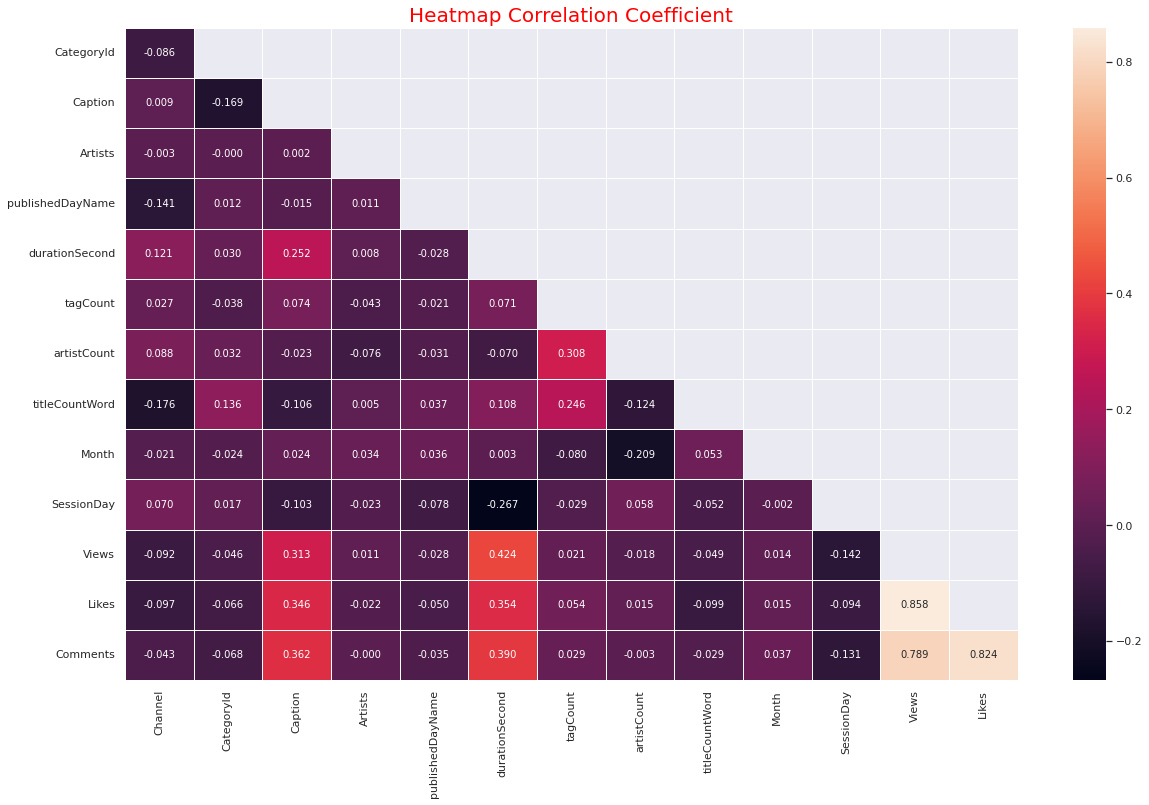

In [47]:
plt.rcParams['figure.figsize'] = 20,12
sns.heatmap(corr, mask = mask, annot = True, 
            fmt = '.3f', linecolor = 'white',linewidths=0.6)
plt.title('Heatmap Correlation Coefficient', fontsize = 20, color = 'red')
plt.show()

## 3.2 Build Regression model to predict